<a href="https://colab.research.google.com/github/smritisinha0801/Edulyt-project/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('Credit Banking.xls')

In [ ]:
df.head(5)

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT


In [ ]:
df.shape

(9999, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Credit_card     9994 non-null   float64       
 1   Product_ID      9999 non-null   int64         
 2   P_CATEGORY      9999 non-null   object        
 3   CONDTION        9999 non-null   object        
 4   Brand           9999 non-null   object        
 5   Price           9999 non-null   float64       
 6   Selling_price   9999 non-null   float64       
 7   Coupon_ID       9979 non-null   object        
 8   Date            9999 non-null   datetime64[ns]
 9   Time            9999 non-null   object        
 10  GTIN            9999 non-null   int64         
 11  MPN             9999 non-null   int64         
 12  Merchant_name   9999 non-null   object        
 13  M_ID            9999 non-null   object        
 14  Payment Method  9999 non-null   object        
 15  Tran

In [ ]:
df.isnull().sum()

,0
Credit_card,5
Product_ID,0
P_CATEGORY,0
CONDTION,0
Brand,0
Price,0
Selling_price,0
Coupon_ID,20
Date,0
Time,0


In [ ]:
#Provide a meaningful treatment where the Credit Card entries are blank
df.dropna(subset=['Credit_card'],inplace=True)


In [ ]:
df['Coupon_ID'].fillna('No Coupon', inplace=True)

<ipython-input-101-c0a83b08d483>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Coupon_ID'].fillna('No Coupon', inplace=True)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])    # Make sure that the return date is after the Purchase Date
df['Return_date'] = pd.to_datetime(df['Return_date'])
df['Return_Date_Invalid'] = df['Return_date'] <= df['Date']


In [ ]:
df.head(10)

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,Return_Date_Invalid
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT,False
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT,False
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT,False
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT,False
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT,False
5,4305.0,922,LUGGAGE,New,IWPJG,3788.97,3698.97,No Coupon,2014-08-18,02:25:07,7436510,436743043,Guitar Center,GN4259,Mobile carrier Billing,75073,0,NaT,False
6,4477.0,616,OFFICE SUPPLIES,Used,EVWJY,1011.90,1001.90,LU503,2014-04-22,10:04:56,2195580,258635926,Cole Hardware,EX7730,Mobile carrier Billing,89706,0,NaT,False
7,4672.0,300,APPLIANCES,New,KZDWR,4918.58,4891.58,UX835,2014-01-20,01:45:09,1593030,943939956,Walgreens,VW7191,Credit card,63096,0,NaT,False
8,5481.0,827,ELECTRONICS,New,OULOW,2830.51,2802.51,KG804,2014-05-12,09:43:54,6339658,532985898,Gymboree,ZF8986,Prepaid card,74652,0,NaT,False
9,5974.0,470,LUGGAGE,Used,TNVON,4783.25,4764.25,ER876,2014-09-23,05:13:44,4604782,832455526,REI,EI6775,Credit card,28877,1,2014-09-30,False


In [ ]:
df1=pd.read_excel('Credit Banking.xls',sheet_name="Curtomer_Info")

In [ ]:
df1.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80,Columbus,Ohio,Masked


In [ ]:
df1.shape

(198, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   C_ID           198 non-null    int64 
 1   Email          198 non-null    object
 2   Name           198 non-null    object
 3   Mobile_number  198 non-null    int64 
 4   Gender         198 non-null    object
 5   Age            198 non-null    int64 
 6   City           198 non-null    object
 7   State          198 non-null    object
 8   Address        198 non-null    object
dtypes: int64(3), object(6)
memory usage: 14.1+ KB


In [ ]:
df1.isnull().sum()

,0
C_ID,0
Email,0
Name,0
Mobile_number,0
Gender,0
Age,0
City,0
State,0
Address,0


In [ ]:
df1['Age'].unique()

array([83, 87, 31, 37, 80, 35, 34, 90, 72, 65, 51, 39, 43, 76, 25, 62, 21,
       68, 42, 91, 81, 85, 70, 50, 26, 19, 18, 27, 52, 95, 47, 15, 73, 24,
       32, 59, 77, 17, 84, 58, 64, 33, 28, 92, 41, 88, 54, 30, 69, 89, 71,
       57, 49, 93, 82, 86, 63, 29, 74, 94, 75, 40, 79, 16, 22, 56, 23, 20,
       36, 67, 48, 55, 78, 60, 53])

In [ ]:
df1=df1[df1['Age']>18] #Age should be greater than 18 for all the CC holders

In [ ]:
df1.head(5)

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80,Columbus,Ohio,Masked


In [ ]:
df['Orginal_Selling_Price']=df['Selling_price']

In [ ]:
mask_discount=(df['Coupon_ID'].notnull()) & (df['Price ']==df['Selling_price']) #Identity where Price is equal to Selling Price even after having a Coupon Code, apply an automatic discount of 5% for those entries.
df.loc[mask_discount, 'Selling_price']=df.loc[mask_discount, 'Price '] *0.95

In [ ]:
df.loc[mask_discount, ['Coupon_ID', 'Price ', 'Selling_price', 'Orginal_Selling_Price']]

,Coupon_ID,Price,Selling_price,Orginal_Selling_Price
16,MD699,4943.44,4696.2680,4943.44
27,NB862,1257.44,1194.5680,1257.44
77,BT328,3994.10,3794.3950,3994.10
127,OG531,2205.71,2095.4245,2205.71
177,CS143,379.56,360.5820,379.56
...,...,...,...,...
9587,BV379,4308.02,4092.6190,4308.02
9588,CD737,706.15,670.8425,706.15
9993,PE754,2831.25,2689.6875,2831.25
9994,FL494,1187.85,1128.4575,1187.85


In [ ]:
mask_no_coupon = (df['Coupon_ID'] == 'No Coupon') #If the Coupon ID is NULL, make sure that NO discount is given, the Selling Price should be equal to Price
df.loc[mask_no_coupon, 'Selling_price'] = df.loc[mask_no_coupon, 'Price ']

In [ ]:
df.loc[mask_no_coupon, ['Coupon_ID', 'Price ', 'Selling_price']]

,Coupon_ID,Price,Selling_price
5,No Coupon,3788.97,3788.97
23,No Coupon,3697.22,3697.22
37,No Coupon,379.49,379.49
61,No Coupon,623.05,623.05
85,No Coupon,2213.77,2213.77
105,No Coupon,2280.16,2280.16
134,No Coupon,635.56,635.56
166,No Coupon,1050.51,1050.51
201,No Coupon,3205.26,3205.26
237,No Coupon,2455.58,2455.58


In [ ]:
# Transaction ID should be unique for all
duplicates = df[df.duplicated(subset=['Transaction ID'], keep=False)]
print("Duplicate Transaction IDs found:")
print(duplicates)

Duplicate Transaction IDs found:
      Credit_card  Product_ID       P_CATEGORY     CONDTION  Brand   Price   \
0          4595.0         534            SHOES          New  RKFCM  1484.74   
1          6679.0         396          LUGGAGE          New  TNVON  1452.50   
2          7075.0         449            SHOES  Refurbished  VKKEA  4308.02   
3          1418.0         145          BEDDING          New  PIUEM  3272.59   
4          6740.0         844      ELECTRONICS         Used  FMBZC   628.67   
...           ...         ...              ...          ...    ...      ...   
9994       8609.0         470       APPLIANCES          New  TTNTN  1187.85   
9995       9725.0         406         CLOTHING         Used  ONKHS  2202.20   
9996       1548.0         694      ELECTRONICS          New  AGSDS  3123.80   
9997       4878.0         552            SHOES          New  RKFCM  1257.44   
9998       8532.0         395  OFFICE SUPPLIES          New  WELZA  2909.68   

      Selling_pric

In [ ]:
duplicate_ids = df['Transaction ID'][df['Transaction ID'].duplicated(keep=False)].unique()
print(duplicate_ids)

[30462 37927 80640 ... 16647  6175 78902]


In [ ]:
def age_gender_segment(df1):  # Customer Segmentation Based on age and gender
    if df1['Gender'] == 'F':
        if df1['Age'] <= 25:
            return 'Young Females'
        elif df1['Age'] <= 45:
            return 'Mid age Females'
        else:
            return 'Old Females'
    else:
        if df1['Age'] <= 25:
            return 'Young Males'
        elif df1['Age'] <= 45:
            return 'Mid age Males'
        else:
            return 'Old Males'

df1['Segment'] = df1.apply(age_gender_segment, axis=1)

In [ ]:
print(df1[['Age', 'Gender', 'Segment']].head(10))

   Age Gender          Segment
0   83      M        Old Males
1   87      F      Old Females
2   31      F  Mid age Females
3   37      M    Mid age Males
4   80      F      Old Females
5   35      M    Mid age Males
6   34      F  Mid age Females
7   90      F      Old Females
8   72      F      Old Females
9   65      M        Old Males


<ipython-input-124-527eb0c8ba2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df1, order=df1['Segment'].value_counts().index, palette='viridis')


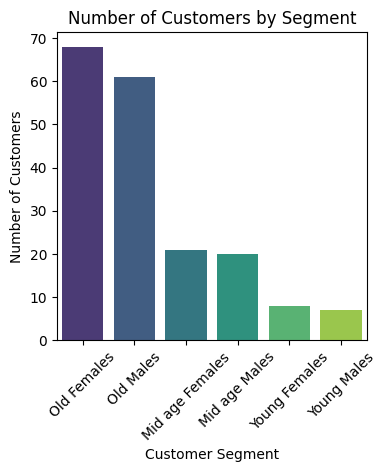

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='Segment', data=df1, order=df1['Segment'].value_counts().index, palette='viridis')
plt.title('Number of Customers by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['Segment'] = df1['Segment']


<ipython-input-128-7291fd7b2eff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Selling_price', data=segment_spend, palette='viridis')


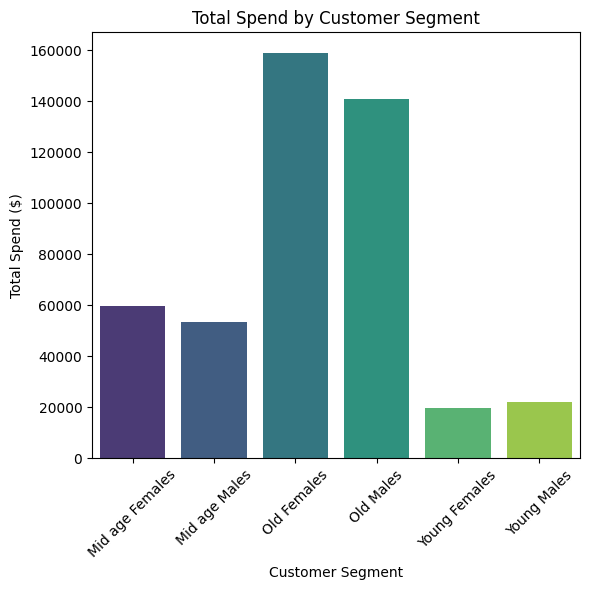

In [ ]:
# Group by Segment and calculate Total Spend
segment_spend = df.groupby('Segment')['Selling_price'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Segment', y='Selling_price', data=segment_spend, palette='viridis')
plt.title('Total Spend by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-130-5e1909b52f97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Paid_By_Credit_Card', data=segment_credit_card, palette='magma')


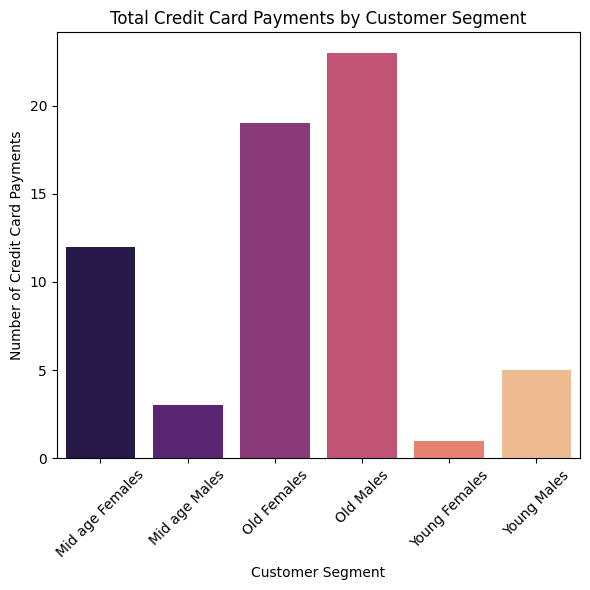

In [ ]:
df['Paid_By_Credit_Card'] = df['Payment Method'].apply(lambda x: 1 if str(x).lower() == 'credit card' else 0)

# Group by Segment and sum the credit card payments(based on swipes)
segment_credit_card = df.groupby('Segment')['Paid_By_Credit_Card'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Segment', y='Paid_By_Credit_Card', data=segment_credit_card, palette='magma')
plt.title('Total Credit Card Payments by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Credit Card Payments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the spend in terms of Product, State and Payment method.
spend_by_product=df.groupby('P_CATEGORY')['Selling_price'].sum().reset_index().sort_values(by='Selling_price', ascending=False)
print(spend_by_product)

          P_CATEGORY  Selling_price
6              DECOR   3.199401e+06
5          COMPUTERS   3.056284e+06
7        ELECTRONICS   2.683372e+06
11   OFFICE SUPPLIES   2.465481e+06
12             SHOES   2.294238e+06
9   KITCHEN & DINING   2.016405e+06
4           CLOTHING   1.971971e+06
3            BEDDING   1.660588e+06
8              GAMES   1.515089e+06
0         APPLIANCES   1.509852e+06
10           LUGGAGE   1.422508e+06
1      BABY CLOTHING   1.341610e+06
2          BABY TOYS   1.113453e+06


In [ ]:
# In terms of condition
spend_by_state=df.groupby('CONDTION')['Selling_price'].sum().reset_index().sort_values(by='Selling_price', ascending=False)
print(spend_by_state)


      CONDTION  Selling_price
0          New   1.321638e+07
2         Used   6.643616e+06
1  Refurbished   6.390256e+06


In [ ]:
# In terms of payment method
spend_by_paymentMet=df.groupby('Payment Method')['Selling_price'].sum().reset_index().sort_values(by='Selling_price', ascending=False)
print(spend_by_paymentMet)

           Payment Method  Selling_price
4  Mobile carrier Billing   1.084716e+07
0             Credit card   9.517427e+06
6            Prepaid card   4.495616e+06
1              Debit card   8.307461e+05
5           Paypal wallet   2.236580e+05
3               Gift card   1.820680e+05
2          Deirect debits   1.535727e+05


In [ ]:
# Calculate the highest 5 spending in all above categories
df_sorted = df.sort_values(['P_CATEGORY', 'Selling_price'], ascending=[True, False])

top5_spend_per_product = df_sorted.groupby('P_CATEGORY').head(5)

top5_spend_per_product[['P_CATEGORY', 'Selling_price', 'CONDTION', 'Payment Method', 'Transaction ID']].head(10)


,P_CATEGORY,Selling_price,CONDTION,Payment Method,Transaction ID
1309,APPLIANCES,4906.58,New,Mobile carrier Billing,37055
2740,APPLIANCES,4906.58,New,Mobile carrier Billing,37055
4171,APPLIANCES,4906.58,New,Mobile carrier Billing,37055
5602,APPLIANCES,4906.58,New,Mobile carrier Billing,37055
7033,APPLIANCES,4906.58,New,Mobile carrier Billing,37055
52,BABY CLOTHING,4633.93,New,Debit card,95979
1483,BABY CLOTHING,4633.93,New,Debit card,95979
2914,BABY CLOTHING,4633.93,New,Debit card,95979
4345,BABY CLOTHING,4633.93,New,Debit card,95979
5776,BABY CLOTHING,4633.93,New,Debit card,95979


In [ ]:
df['Age']=df1['Age']

In [ ]:
# Give your opinion on return category like customers returning the products belongs to which state, age group, condition, category of the product or is it related to discount
df['Returned'] = df['Return_date'].notnull()

returns_by_state = df[df['Returned']].groupby('CONDTION')['Transaction ID'].count().reset_index().sort_values(by='Transaction ID', ascending=False)

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['<25', '25-45', '45-65', '65+'])
returns_by_age = df[df['Returned']].groupby('Age_Group')['Transaction ID'].count().reset_index().sort_values(by='Transaction ID', ascending=False)

returns_by_category = df[df['Returned']].groupby('P_CATEGORY')['Transaction ID'].count().reset_index().sort_values(by='Transaction ID', ascending=False)

df['Discount %'] = (df['Price '] - df['Selling_price']) / df['Price '] * 100
returns_vs_discount = df[df['Returned']]['Discount %'].describe()

print("Returns by State:\n", returns_by_state)
print("Returns by Age Group:\n", returns_by_age)
print("Returns by Category:\n", returns_by_category)
print("Returns vs Discount % Summary:\n", returns_vs_discount)


Returns by State:
       CONDTION  Transaction ID
0          New             712
2         Used             433
1  Refurbished             387
Returns by Age Group:
   Age_Group  Transaction ID
3       65+               4
0       <25               1
1     25-45               1
2     45-65               1
Returns by Category:
           P_CATEGORY  Transaction ID
6              DECOR             182
5          COMPUTERS             171
7        ELECTRONICS             159
12             SHOES             141
11   OFFICE SUPPLIES             122
9   KITCHEN & DINING             120
4           CLOTHING             119
8              GAMES             113
10           LUGGAGE              95
0         APPLIANCES              92
3            BEDDING              83
1      BABY CLOTHING              73
2          BABY TOYS              62
Returns vs Discount % Summary:
 count    1532.000000
mean        2.687952
std         6.881775
min         0.000000
25%         0.738481
50%         1.145

<ipython-input-136-0de50604d6fe>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returns_by_age = df[df['Returned']].groupby('Age_Group')['Transaction ID'].count().reset_index().sort_values(by='Transaction ID', ascending=False)


In [ ]:
# Create a profile of customers in terms of timing of their order
df['Purchase_Hour'] = df['Time'].apply(lambda x: x.hour)

order_counts_by_hour = df['Purchase_Hour'].value_counts().sort_index().reset_index()
order_counts_by_hour.columns = ['Time (Hour of Day)', 'Count of Orders']

print(order_counts_by_hour)

    Time (Hour of Day)  Count of Orders
0                    0              419
1                    1              385
2                    2              349
3                    3              481
4                    4              336
5                    5              392
6                    6              315
7                    7              476
8                    8              462
9                    9              385
10                  10              399
11                  11              553
12                  12              488
13                  13              375
14                  14              424
15                  15              292
16                  16              389
17                  17              509
18                  18              446
19                  19              350
20                  20              419
21                  21              462
22                  22              447
23                  23              441


Average Discount by Payment Method:
            Payment Method  Discount %
4  Mobile carrier Billing    3.131451
1              Debit card    2.762834
0             Credit card    2.610377
2          Deirect debits    2.419332
6            Prepaid card    1.981386
3               Gift card    1.468813
5           Paypal wallet    1.394393


<ipython-input-139-525fd6f2e651>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Discount %', data=discount_by_payment, palette='viridis')


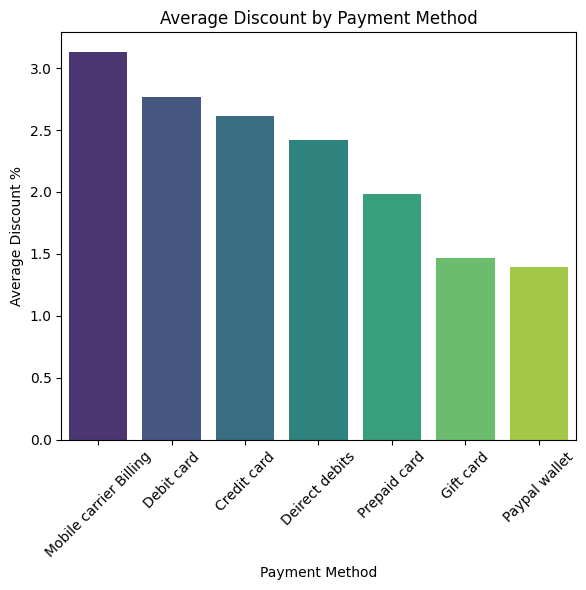

In [ ]:
# Which payment method is providing more discount for customers?
df['Discount %'] = (df['Price '] - df['Selling_price']) / df['Price '] * 100

discount_by_payment = df.groupby('Payment Method')['Discount %'].mean().reset_index().sort_values(by='Discount %', ascending=False)

print("Average Discount by Payment Method:\n", discount_by_payment)

plt.figure(figsize=(6,6))
sns.barplot(x='Payment Method', y='Discount %', data=discount_by_payment, palette='viridis')
plt.title('Average Discount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Discount %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Number of Orders by Value Type:
    Value_Type  Transaction ID
1   Low Value             720
0  High Value             708


<ipython-input-141-d34c8fec4f61>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value_Type', y='Transaction ID', data=orders_by_value_type, palette='Set2')


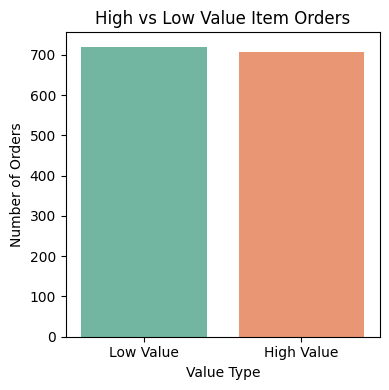

In [ ]:
# Create a profile for high value items vs low value items and relate that wrt to their number of orders
threshold = df['Price '].median()

df['Value_Type'] = df['Price '].apply(lambda x: 'High Value' if x > threshold else 'Low Value')

orders_by_value_type = df.groupby('Value_Type')['Transaction ID'].nunique().reset_index().sort_values(by='Transaction ID', ascending=False)

print("Number of Orders by Value Type:\n", orders_by_value_type)

plt.figure(figsize=(4,4))
sns.barplot(x='Value_Type', y='Transaction ID', data=orders_by_value_type, palette='Set2')
plt.title('High vs Low Value Item Orders')
plt.xlabel('Value Type')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


<ipython-input-143-f2c9c018d6c7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_discount_bin = df.groupby('Discount_Bin')['Transaction ID'].nunique().reset_index().sort_values(by='Transaction ID', ascending=False)
<ipython-input-143-f2c9c018d6c7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount_Bin', y='Transaction ID', data=orders_by_discount_bin, palette='cubehelix')


Orders by Discount Bin:
   Discount_Bin  Transaction ID
1         0-5%            1281
2        5-10%             150
3       10-20%              36
0           0%              20
4       20-50%              13
5         50%+               9


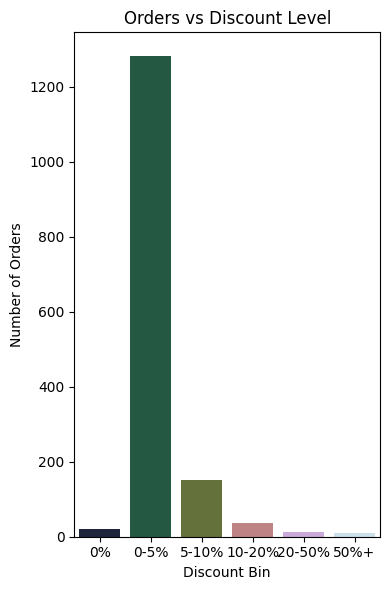

In [ ]:
# Do you think if merchant provides more discount then can it will lead to increase in number of orders?
df['Discount_Bin'] = pd.cut(df['Discount %'], bins=[-1, 0, 5, 10, 20, 50, 100],
                            labels=['0%', '0-5%', '5-10%', '10-20%', '20-50%', '50%+'])

orders_by_discount_bin = df.groupby('Discount_Bin')['Transaction ID'].nunique().reset_index().sort_values(by='Transaction ID', ascending=False)

print("Orders by Discount Bin:\n", orders_by_discount_bin)

plt.figure(figsize=(4,6))
sns.barplot(x='Discount_Bin', y='Transaction ID', data=orders_by_discount_bin, palette='cubehelix')
plt.title('Orders vs Discount Level')
plt.xlabel('Discount Bin')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()
